## Classification and Regression Trees (CART) - Decision Trees

This week's tutorial will cover CART techniques, also known as Classification and Regression Trees. At the core of these models is the Decision Trees Algorithm/Technique. In our discussion today, we will cover the foundations of Decision Trees, discuss the concepts of Impurity (also referred to as Entropy or Chaos), discuss the main questions surrounding decision tree node selection and implement algorithms to generate a decision Tree. More specifically, we will cover the following concepts:

### Decision Trees

We will begin by introducing decision trees as a fundamental machine learning model used for both classification and regression tasks. We'll explore how they represent decisions visually, allowing for easy interpretation and understanding.

### Entropy and Impurity Concepts

Next, we'll delve into the concepts of entropy and impurity, which are critical for understanding how decision trees split data. We will define entropy as a measure of disorder or uncertainty in the dataset and discuss how this concept is used to assess the quality of a split.

Node SelectionIn this section, we will focus on the criteria used for selecting nodes when constructing a decision tree. We will discuss various algorithms that determine the best splits based on measures of impurity. You'll learn about common strategies such as the Information Gain, Gain Ratio, and Gini Index, and how these methods influence the depth and complexity of the resulting tree.

## Implementation with R



Finally, we implement the classification and Regression algorithms using R's tidy models.

## Decision Trees

Tree-based models are a type of machine learning technique that uses a tree- like structures to make predictions. The most basic type of a tree-based model is a Decision Tree. A Decision Tree guides observation through a tree-like structure with many branches. Below is an example of a simple tree model, that predicts the type of Vehicle based on some set of features.

## Sample Decision Tree

![Screenshot 2024-10-21 at 10.12.01.png](<attachment:Screenshot 2024-10-21 at 10.12.01.png>)


Figure is taken from Machine Learning with R, Tidyverse and MLR -Textbook

Some important terminology here:

1. __Root Node__: The root node is the parent node that determine the partition of the rest of the tree. It contains all data prior to splitting

2. __Decision Nodes__: The decision nodes are subsequent nodes that further split the data into either decision nodes or leaf nodes

3. __Leaf Nodes__: Leaf nodes are the end point of the tree, they house the class/label of the observations

Instinctively, we may wish to ask, given the knowledge of the nature of a decision tree, how it is that the algorithm we choose to use will decide how the tree is formed. In particular, there are three questions to consider:

1. What variable makes the best root node?
2. Which variables make the best decision nodes?
3. In what order should these decision nodes be?

## Entropy and Theory of Information

Entropy is a concept commonly linked to physics and mathematics that concerns with the measure of chaos in a system. To reduce it to our use in data analytics and machine learning, entropy is a technique that attempts to measure impurity present within a particular data set. In order words, we can use it to measure how homogeneous our data set is. This is useful because as we seek to classify objects, we wish to reduce impurity, or phrased differently, maximize homogeneity.

Formally, Entropy of a variable can be calculated using the following formula:

$$ (Shannon's)Entropy = H(Y, X) = - \sum_{i=1}^{m} p_i * log_2(p_i) $$

where

$Y$: categorical dependent variable <br>
$X_k$: Set of predictor variables with $k$ distinct values. <br>
$p$ is the probability of a certain category $m$ in $Y$. <br>

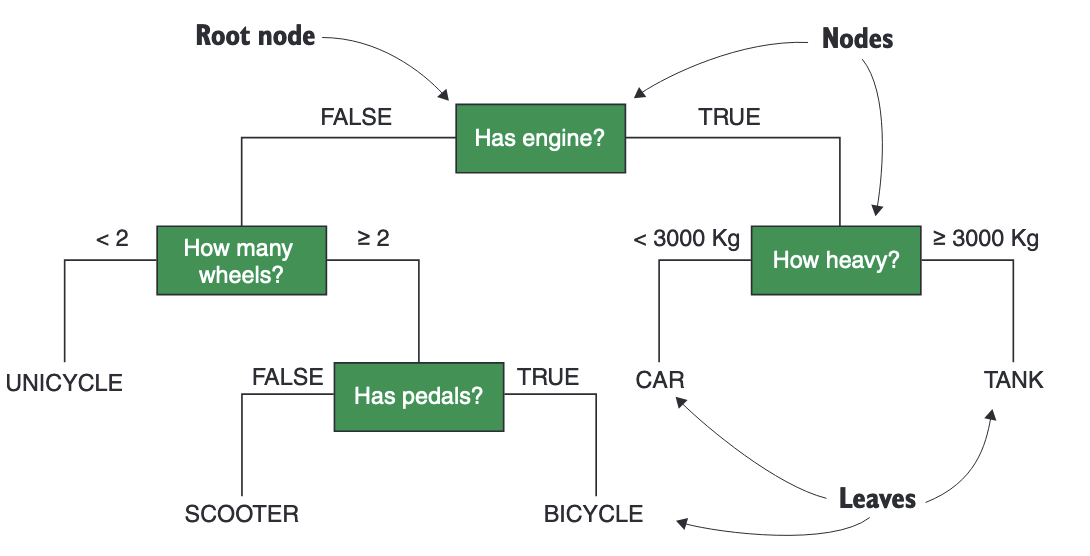

## Entropy Example for the Binary Case

Let's look at an example of the Binary case, where the labels belong to two classes only. The code below will evaluate the entropy against different composition of the labels. For simplicity, let's say, if there are labels $A$ and $B$, we will generate different proportions for A and B will equal to $1-p(A)$.

The general formula for Entropy for Binary case is then:

$$
Entropy = - p(A) * log_2(P(A)) - (1 - P(A)) * log2(1 - p(A)) = -plog_2(p) - (1 - p)log_2(1 - p)
$$

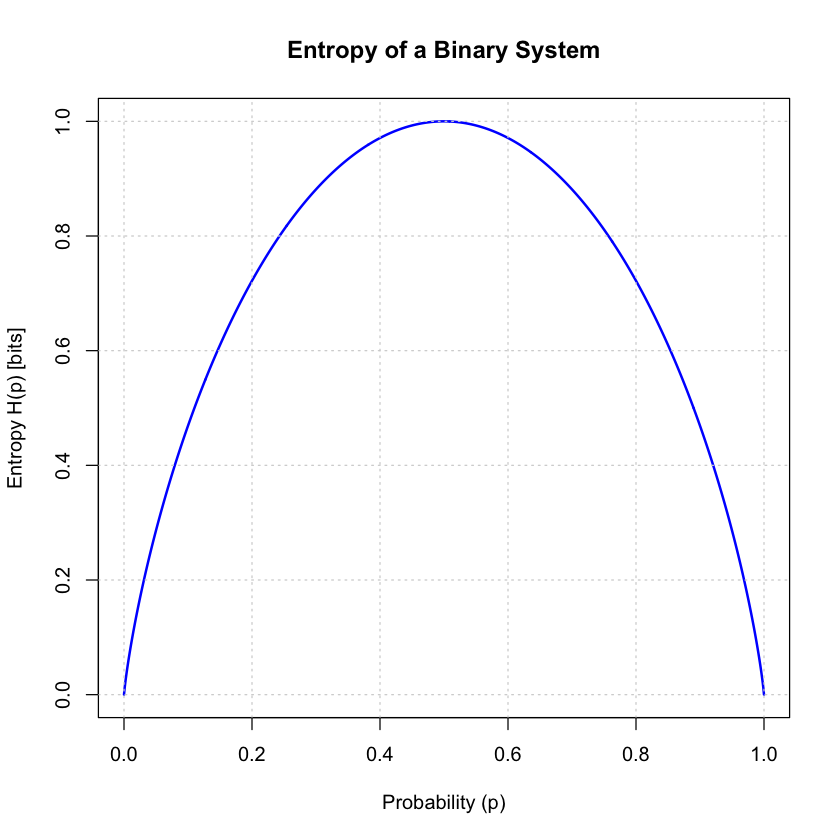

In [1]:
# NOTE HERE: .Machine$double.eps  is a very small number

# Define the entropy function for a binary system
entropy_binary <- function(p, base = 2) {
  # Ensure probabilities are within (0,1) to avoid log(0)
  p <- ifelse(p == 0, .Machine$double.eps, ifelse(p == 1, 1 - .Machine$double.eps, p))
  q <- 1 - p
  # Compute the entropy
  H <- - (p * log(p, base = base) + q * log(q, base = base))
  return(H)
}

# Create a sequence of probability values from 0 to 1
p_values <- seq(0, 1, length.out = 1000)

# Calculate entropy for each probability
H_values <- entropy_binary(p_values)

# Plot the entropy as a function of probability
plot(p_values, H_values, type = 'l', lwd = 2, col = 'blue',
     xlab = 'Probability (p)',
     ylab = 'Entropy H(p) [bits]',
     main = 'Entropy of a Binary System')

# Add grid lines for better visualization
grid()

Think through the interpretation of the Curve above. Specifically, Entropy of a system when the probabilities of $A$ and $B$ are at .5. That is, at the highest randomness, the entropy is high. As the probability of an individual label becomes higher than the other, the entropy reduces.

### How to Pick Nodes - Expected Entropy and Information Gain

The entropy calculation gives us everything we need to be able to select nodes for splits. Naturally, with a few modifications, we can apply entropy to develop a more useful measure that tells us exactly how much impurity we would reduce by selecting a specific node. To do this we need two more modified versions of entropy:

### 1.1. Expected Entropy

The first idea is the expected Entropy. The Expected Entropy provides an estimated entropy value when a particular variable is selected. It does this by computing the Expected Entropy of the child nodes given the probabilities of their categories. Mathematically, the formula is:

Suppose an Attribute $A$ with $k$ distinct values is selected as a node, to get the expected entropy, we compute the following:

$$
EH(A) = \sum_{i=1}^{k} \frac {p_i + n_i} {p + n} H(\frac {p_i}{p_i + n_i}, \frac{n_i}{p_i + n_i} )
$$

Let us use an example to demonstrate the computation above:

Suppose we have 12 observations equally distributed of a label as to whether an individual will play a game based on weather (and other factors). On this example, we will use the weather as a node to compute the EH value.


![Screenshot 2024-10-21 at 22.16.55.png](<attachment:Screenshot 2024-10-21 at 22.16.55.png>)



$$
EH(Weather) = p_{rainy} * H(p_{rainy, play}, p_{rainy,not\ play}) + p_{sunny} * H(p_{sunny,play}, p_{sunny,not\ play}) + p_{cloudy} * H(p_{cloudy,play}, p_{cloudy,not\ play})
$$

To implement it directly, the EH(Weather) is given by:

$$
EH(Weather) = \frac {2}{12} * H(0, 1) + \frac {4}{12} * H(1, 0) + \frac {6}{12} * H(2/6, 4/6) = .4589
$$

## Information Gain

In the above example, we have calculated Expected Entropy at a given column variable. In reality we will have to compute these for all variables. However this is till not sufficient, the final piece is to get the information gain which is the difference between entropy of the complete data set and the entropy at the variable.

$$IG = H(Y,X) - EH(A)$$

For our example above, this will correspond to:

$$ IG(weather) = 1 - EH(Weather) = 1 - .4589 = .541 $$

So by choosing the Weather variable, we have reduced the chaos, or gained information from 1 to .541. Typically we do this across all the variables and do it recursively until we have the tree.


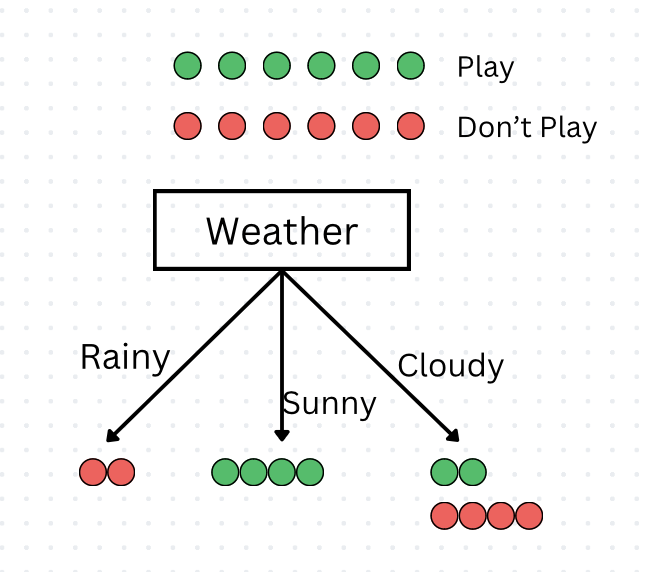

In [2]:
# loading the necessary libraries
# keep in mind that some libraries need installing
library(ISLR)         
library(ggthemr)
library(ggplot2)
library(tidyverse)
library(tidymodels)
library(rpart.plot)
library(gt)


# setting theme
ggthemr('pale')

Lade n"otiges Paket: ggplot2

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v lubridate 1.9.3     v tibble    3.2.1
v purrr     1.0.2     v tidyr     1.3.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
-- Attaching packages -------------------------------------- tidymodels 1.2.0 --

v broom        1.0.7     v rsample      1.2.1
v dials        1.3.0     v tune         1.2.1
v infer        1.0.7     v workflows    1.1.4
v modeldata    1.4.0     v workflowsets 1.1.0
v parsnip      1.2.1     v yardstick    1.3.1
v recipes      1.1.0     

-- Conflicts ----------------------------------------- tidymodels_conflicts() --
x scales::discard() masks purrr::discard()
x dply

In [3]:
# reading the dataset into the variable
data("Carseats")

# show the sample of the dataset
car_seat_sales <- as_tibble(Carseats)
head(car_seat_sales)

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [4]:
names(car_seat_sales)

[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population" 
 [6] "Price"       "ShelveLoc"   "Age"         "Education"   "Urban"      
[11] "US"

In [5]:
# looking at the features of the ames dataset
dim(car_seat_sales)

[1] 400  11

### Fitting a Classification Decision Tree

We begin by classifying the dataset using Sales as our dependent variables and other variables as predictors. As we have seen above, the sales data is in fact a numerical value. Therefore, we need to convert is to a factor variable.

In [6]:
# create a new column and remove the older sales
car_seat_sales <- car_seat_sales %>% 
                  mutate( High = factor( if_else(Sales > 8, 'Yes', 'No'))) %>% 
                  select(-Sales)

Now, we can generate our train and test sets.

In [7]:
# setting seed for reproducibility
set.seed(3261)

data_split <- initial_split(car_seat_sales, prop = .8, strata = High)
train_data <- training(data_split)
test_data <- testing(data_split)

dim(train_data); dim(test_data);

[1] 319  11

[1] 81 11

### Decision Tree Model Setup

As we have seen a few times now with tidymodels, we will need to configure our model by setting up the engine and task definition to suit our specific needs.

In [8]:
# defining the model specification
decision_tree_classifier <- decision_tree( tree_depth = 6 ) %>%
                            set_engine('rpart') %>%
                            set_mode('classification')
      
# fitting the model
decision_tree_fit <- decision_tree_classifier %>% fit(High ~., data = train_data)

decision_tree_fit

parsnip model object

n= 319 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 319 131 No (0.5893417 0.4106583)  
   2) ShelveLoc=Bad,Medium 254  79 No (0.6889764 0.3110236)  
     4) Price>=92.5 215  51 No (0.7627907 0.2372093)  
       8) Age>=49.5 123  14 No (0.8861789 0.1138211) *
       9) Age< 49.5 92  37 No (0.5978261 0.4021739)  
        18) Price>=124.5 46   9 No (0.8043478 0.1956522) *
        19) Price< 124.5 46  18 Yes (0.3913043 0.6086957)  
          38) CompPrice< 131.5 30  13 No (0.5666667 0.4333333)  
            76) Advertising< 10.5 20   5 No (0.7500000 0.2500000) *
            77) Advertising>=10.5 10   2 Yes (0.2000000 0.8000000) *
          39) CompPrice>=131.5 16   1 Yes (0.0625000 0.9375000) *
     5) Price< 92.5 39  11 Yes (0.2820513 0.7179487)  
      10) Income< 57 9   2 No (0.7777778 0.2222222) *
      11) Income>=57 30   4 Yes (0.1333333 0.8666667) *
   3) ShelveLoc=Good 65  13 Yes (0.2000000 0.8000000)  
     6) Price>=142.5 8 

### Visualizing the Tree

To visualize the decision tree notes, we need to extract the model fit from the engine and pass it to our rpart.plot which will render the tree. The visualization allows us to see the feature importance.

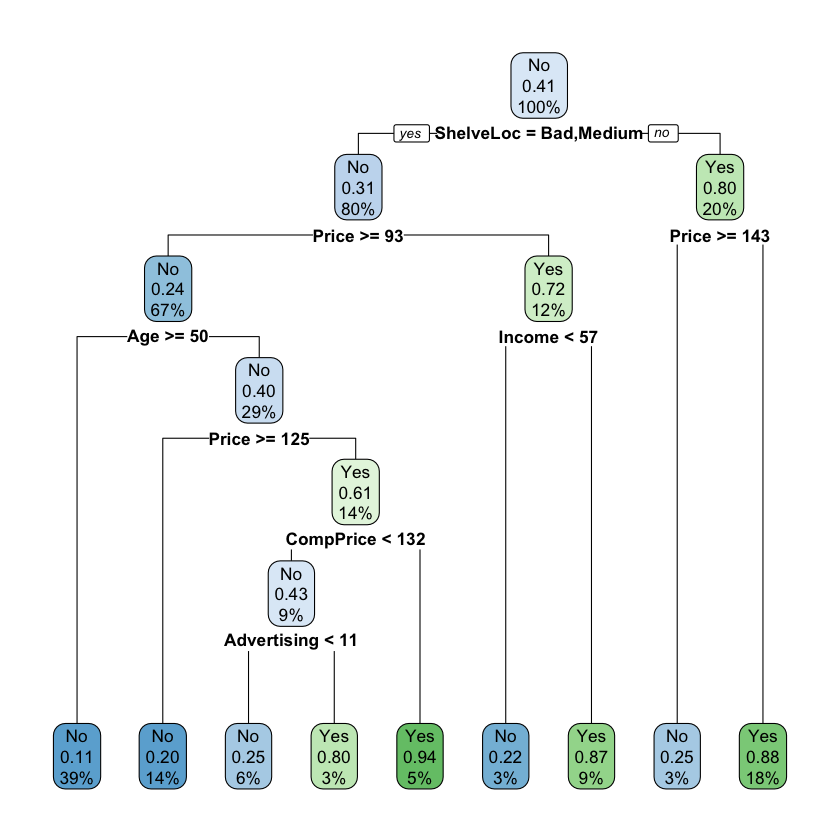

In [9]:
extract_fit_engine(decision_tree_fit) %>%
    rpart.plot(roundint=FALSE)

We see that the most important node for the sales is the Shelving location. In particular, let us note that the node differentiates between Good vs. Medium and Bad locations. It is also interesting to note that the price comes second to location.

Model Accuracy and Fit Assessment

Like with every other classification model, we can compute the accuracy and confusion matrix to further investigate the model performance. We do this with both the test and train sets.

In [10]:
# train dataset accuracy
augment( decision_tree_fit, new_data = train_data ) %>%
    accuracy(truth = High, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8557994


In [11]:
# Train Confusion Matrix
augment( decision_tree_fit, new_data = train_data ) %>%
    conf_mat(truth = High, estimate = .pred_class)

          Truth
Prediction  No Yes
       No  174  32
       Yes  14  99

The training set accuracy is at 85%. Without any optimization parameters, this is a relatively good accuracy level.

In [12]:
# test dataset accuracy
augment( decision_tree_fit, new_data = test_data ) %>%
    accuracy(truth = High, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7654321


The test set accuracy is at ~76%, nearly ~10 percentage points lower than the training set.

### Tuning the Complexity of a Decision Tree

The decision tree classifier developed above has not been tuned or cross-validated to determine the depth of the tree that is best performing. To do this, we implement a grid search on k_fold validation. The implementation below is an example of how to execute this.

In [13]:
#defining the model
decision_tree_classifier <- decision_tree() %>%
                            set_engine('rpart') %>%
                            set_mode('classification')

# classification workflow
decision_tree_class_workflow <- workflow() %>%
                                add_model( decision_tree_classifier %>% 
                                set_args( cost_complexity = tune() ) ) %>% # tree_depth = tune()
                                add_formula(High ~.)

# defining cross validation and parameter grid
car_seats_kfold <- vfold_cv(train_data) # by defaults this is a 10 fold validation

# Generate 10 values from this grid in the range (-3, -1) = cost complexity: 1/(x + 1)
# (the relation of the cost complexity function works well with these values)
param_grid <- grid_regular( cost_complexity( range = c(-3, -1)), levels = 10 ) 

# tuning the model
tune_res <- tune_grid(
    decision_tree_class_workflow,
    resamples = car_seats_kfold,
    grid = param_grid,
    metrics = metric_set(accuracy)
)

### Visualizing Cost Complexity

The autoplot() function returns the Accuracy to Cost_Complexity parameter to help us best assess how the grid search performed. We can see that model 7 performed best yielding the highest accuracy.

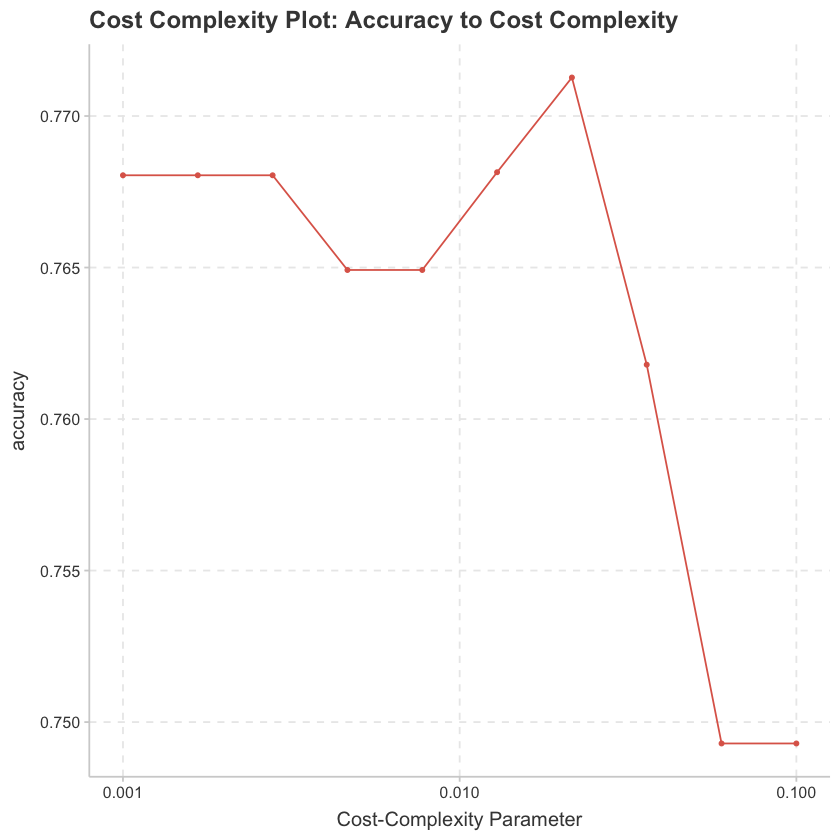

In [14]:
autoplot(tune_res) + ggtitle('Cost Complexity Plot: Accuracy to Cost Complexity')

### Extracting the Best Performing Model

From the visualization, we know that the best performing model based on accuracy is Model 7. We can now extract the model using the function select_subset.

In [15]:
best_complexity <- select_best(tune_res, metric = "accuracy")
best_complexity

cost_complexity,.config
<dbl>,<chr>
0.02154435,Preprocessor1_Model07


### Fitting the Best Model to the Full Train Data

With have performed cross validation to extract the best performing model.

In [16]:
# extracting the final classifier
decision_tree_final_classifier <- finalize_workflow( decision_tree_class_workflow, best_complexity )

# fitting it to the full train data
decision_tree_final_fit <- fit(decision_tree_final_classifier, data = train_data)

decision_tree_final_fit

== Workflow [trained] ==========================================================
Preprocessor: Formula
Model: decision_tree()

-- Preprocessor ----------------------------------------------------------------
High ~ .

-- Model -----------------------------------------------------------------------
n= 319 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 319 131 No (0.5893417 0.4106583)  
   2) ShelveLoc=Bad,Medium 254  79 No (0.6889764 0.3110236)  
     4) Price>=92.5 215  51 No (0.7627907 0.2372093)  
       8) Age>=49.5 123  14 No (0.8861789 0.1138211) *
       9) Age< 49.5 92  37 No (0.5978261 0.4021739)  
        18) Price>=124.5 46   9 No (0.8043478 0.1956522) *
        19) Price< 124.5 46  18 Yes (0.3913043 0.6086957)  
          38) CompPrice< 131.5 30  13 No (0.5666667 0.4333333)  
            76) Advertising< 10.5 20   5 No (0.7500000 0.2500000) *
            77) Advertising>=10.5 10   2 Yes (0.2000000 0.8000000) *
          39) CompPrice>=131.5 16

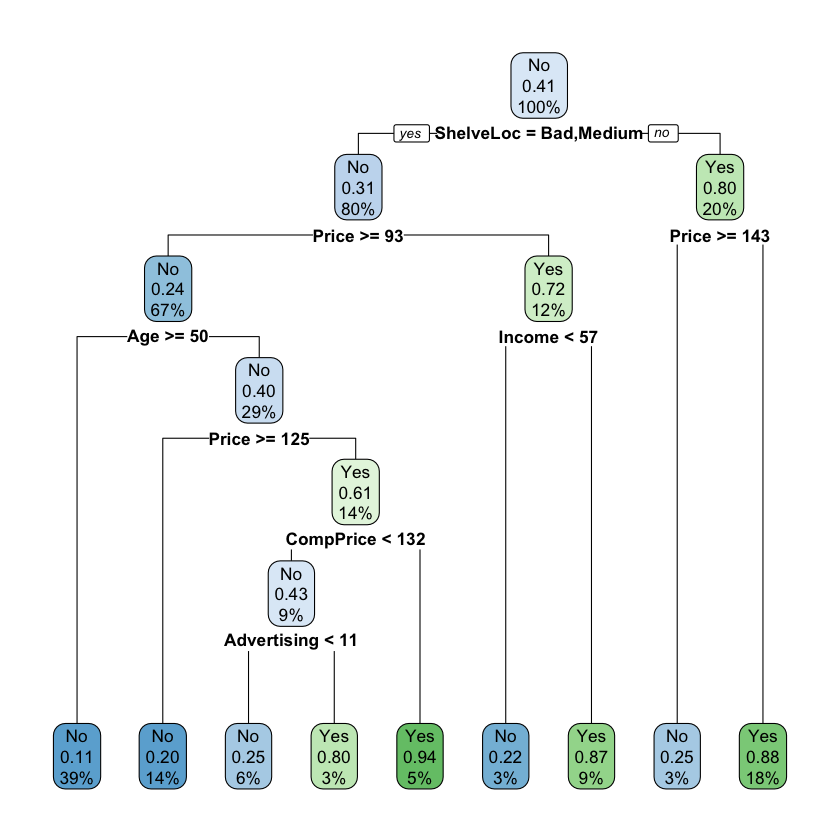

In [17]:
decision_tree_final_fit %>%
  extract_fit_engine() %>%
  rpart.plot(roundint = FALSE)

In [18]:
# train dataset accuracy
augment( decision_tree_final_fit, new_data = train_data ) %>%
    accuracy(truth = High, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8557994


In [19]:
# test dataset accuracy
augment( decision_tree_final_fit, new_data = test_data ) %>%
    accuracy(truth = High, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7654321


Using the improved model from the grid search, we observe that the performance has not improved from the original decision tree model. The depth of the decision tree for this dataset is not very significant to suggest that pruning strategies may be efficient. Exploring other techniques could improve accuracy. As it stands, we are able to classify new dataset with 76% accuracy.

### Fitting Regression Trees

For this part of the lab lab, we will use the Ames Housing dataset, similar to the dataset from the first lab to perform regression using Decision Trees. The dataset is available on the course repository. You can follow along the content to implement the Lab Content.

In [20]:
# loading the ames dataset
data("ames")

head(ames, n=10)

MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>,<dbl>,<dbl>
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.61975,42.05403
One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.61976,42.05301
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.61939,42.05266
One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.61732,42.05125
Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.63893,42.06090
Two_Story_1946_and_Newer,Residential_Low_Density,78,9978,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Fence,None,0,6,2010,WD,Normal,195500,-93.63893,42.06078
One_Story_PUD_1946_and_Newer,Residential_Low_Density,41,4920,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,None,0,4,2010,WD,Normal,213500,-93.63379,42.06298
One_Story_PUD_1946_and_Newer,Residential_Low_Density,43,5005,Pave,No_Alley_Access,Slightly_Irregular,HLS,AllPub,Inside,...,No_Fence,None,0,1,2010,WD,Normal,191500,-93.63383,42.06073
One_Story_PUD_1946_and_Newer,Residential_Low_Density,39,5389,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Fence,None,0,3,2010,WD,Normal,236500,-93.63285,42.06112


The response variable from the dataset is the Sale_Price. As see on the data overview, there are a number of variables/features that are part of the dataset. We will fit all of these features into the Tree Model.

In [21]:
# for reproducibility
set.seed(5672)

ames_split <- initial_split(ames, prop = .8)

# training datasets
train_data <- training(ames_split)
test_data <- testing(ames_split)

dim(train_data); dim(test_data);

[1] 2344   74

[1] 586  74

In [22]:
# fitting a regression
decision_tree_regression <-  decision_tree() %>%
                             set_engine("rpart") %>%
                             set_mode("regression")

In [23]:
# fitting a regression tree
reg_tree_fit <- fit(decision_tree_regression, data = train_data, formula =  Sale_Price ~ .)

reg_tree_fit

parsnip model object

n= 2344 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 2344 1.534682e+13 181783.8  
   2) Garage_Cars< 2.5 2025 6.031772e+12 161560.3  
     4) Neighborhood=North_Ames,Old_Town,Edwards,Sawyer,Mitchell,Brookside,Iowa_DOT_and_Rail_Road,South_and_West_of_Iowa_State_University,Meadow_Village,Briardale,Northpark_Villa,Blueste,Landmark 1146 1.514126e+12 131477.7  
       8) Gr_Liv_Area< 1324.5 709 5.426151e+11 118965.3  
        16) Neighborhood=Old_Town,Edwards,Brookside,Iowa_DOT_and_Rail_Road,South_and_West_of_Iowa_State_University,Meadow_Village,Briardale 334 2.256970e+11 102979.9 *
        17) Neighborhood=North_Ames,Sawyer,Mitchell,Northpark_Villa,Blueste,Landmark 375 1.555519e+11 133203.1 *
       9) Gr_Liv_Area>=1324.5 437 6.804199e+11 151778.1 *
     5) Neighborhood=College_Creek,Somerset,Northridge_Heights,Gilbert,Northwest_Ames,Sawyer_West,Crawford,Timberland,Northridge,Stone_Brook,Clear_Creek,Bloomington_Heights,Veenker,Greens,Green

### Pruning Complexity Parameter

The rpart engine performs a range of cost complexity assessments even with the base model. It performs a 10-fold CV by default. The plotcp() method provides us with the visualization of the validation and a way to choose the number of terminal nodes to use. In the visualization below, 11 nodes seem to be best performing.

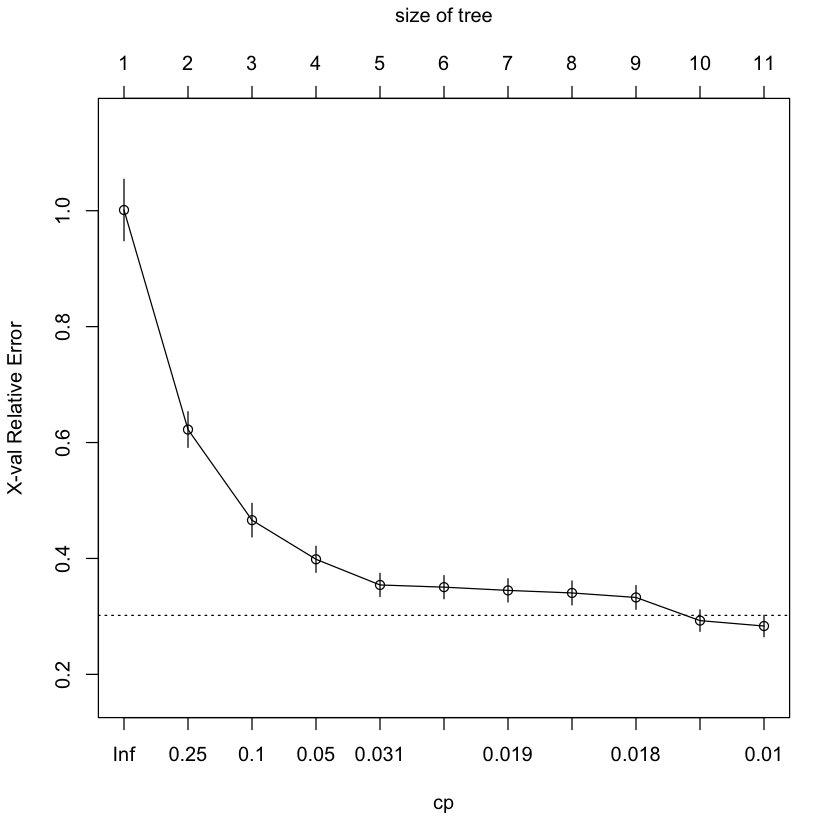

In [24]:
reg_tree_fit %>% 
  extract_fit_engine() %>% 
  plotcp()

<br>

### Model Fit Assessment and Tree Visualization

As this is a regression task, we can extract regression model assessment metrics such as rmse to the dataset.

In [25]:
# showing the top predicted values
augment( reg_tree_fit, new_data = train_data ) %>%
    rmse( truth = Sale_Price, estimate = .pred )

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,38740.54


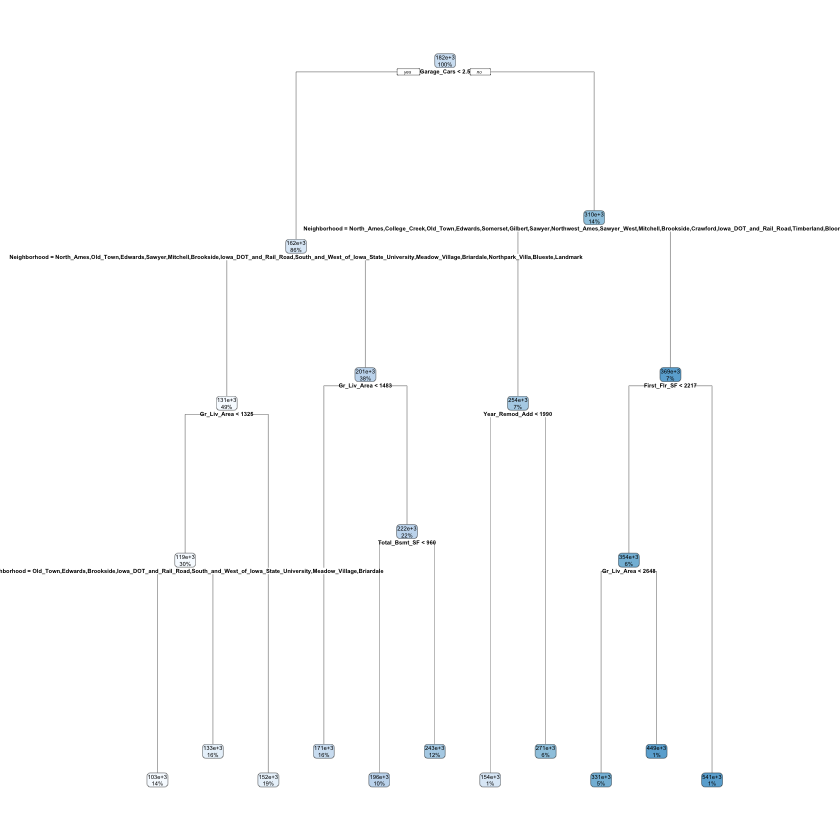

In [26]:
#  Visualizing the Decision Tree
reg_tree_fit %>% extract_fit_engine() %>% rpart.plot(roundint = FALSE) 

### Predictions on Test and New Observations

We can then run predictions on the test data set and/or new observation in the same way we have with the train set above.

In [27]:
augment( reg_tree_fit, new_data = train_data ) %>%
    rmse( truth = Sale_Price, estimate = .pred )

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,38740.54


### Cross-Validation for Complexity Parameter Exercise

On the classification problem, we demonstrated how to perform a cross-validation on the Complexity Parameter. Your exercise for the lab is then to replicate that for the Regression Trees. You can use the following as a guide.

### Create a model workflow

1. Add the cost_complexity = `tune()` within the `set_args()` function.
2. Add the `add_formula()` to the workflow
3. Define a `vfold_cv` on the data set
4. Create a grid parameter space.
5. Run the tuning with `tune_grid()`

### Questions:

What does the Cost-Complexity Parameter Plot look like?

How would you compare the metric for the best_subset model with the model above?

How would you visualize the tree of the best model?